# Regressão 01 - tarefa 01

### 1. Explorando a base de gorjetas

a. Na aula fizemos uma regressão de ```tip``` explicada por ```net_bill```. Carregue os pacotes e a base, crie as variáveis necessárias como na aula, e reproduza esta regressão.

b. Reproduza também o gráfico de dispersão dessas duas variáveis.

                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.333
Model:                            OLS   Adj. R-squared:                  0.330
Method:                 Least Squares   F-statistic:                     120.6
Date:                Tue, 24 Sep 2024   Prob (F-statistic):           5.02e-23
Time:                        18:50:39   Log-Likelihood:                -375.63
No. Observations:                 244   AIC:                             755.3
Df Residuals:                     242   BIC:                             762.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.3307      0.168      7.907      0.0

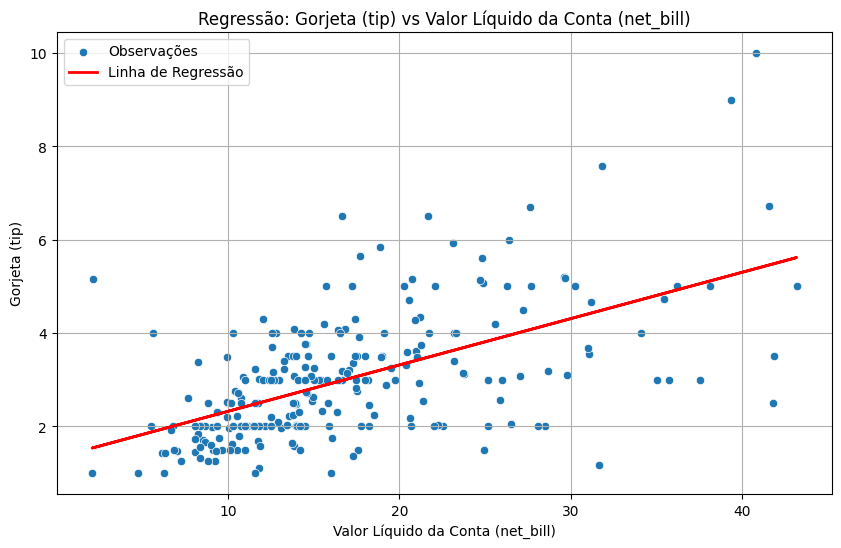

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from seaborn import load_dataset
import statsmodels.formula.api as smf
import statsmodels.api as sm


tips = sns.load_dataset("tips")
# Calcular a variável 'net_bill'
tips['net_bill'] = tips['total_bill'] - tips['tip']

# Ajustar o modelo de regressão
X = tips['net_bill']
y = tips['tip']
X = sm.add_constant(X)  # Adiciona a constante ao modelo
model = sm.OLS(y, X).fit()  # Ajusta o modelo

# Exibir o resumo do modelo
print(model.summary())

# Plotar o gráfico de dispersão com a linha de regressão
plt.figure(figsize=(10, 6))
sns.scatterplot(x='net_bill', y='tip', data=tips, label='Observações')
plt.plot(tips['net_bill'], model.predict(X), color='red', label='Linha de Regressão', linewidth=2)

plt.title('Regressão: Gorjeta (tip) vs Valor Líquido da Conta (net_bill)')
plt.xlabel('Valor Líquido da Conta (net_bill)')
plt.ylabel('Gorjeta (tip)')
plt.legend()
plt.grid()
plt.show()

### 2. Mudança de perspectiva

Agora ajuste um modelo de regressão de ```tip_pct``` por ```net_bill```. Construa o gráfico de dispersão correspondente.

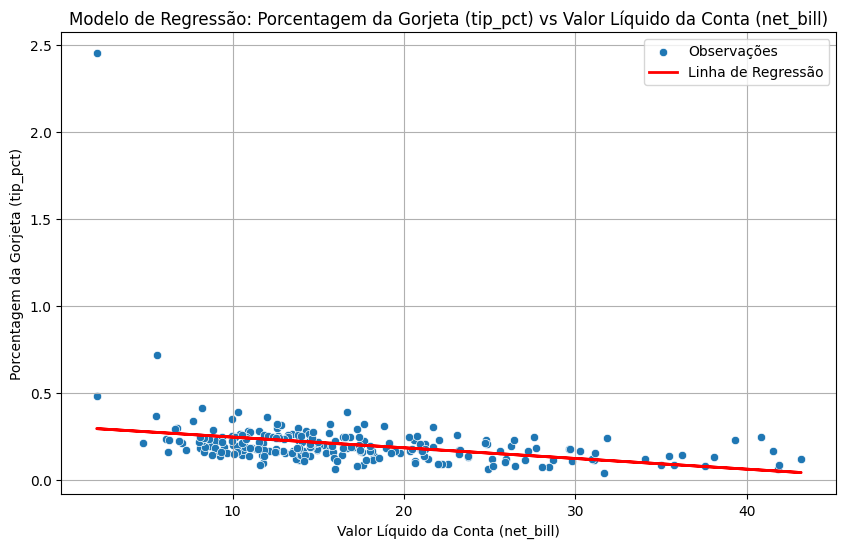

                            OLS Regression Results                            
Dep. Variable:                tip_pct   R-squared:                       0.091
Model:                            OLS   Adj. R-squared:                  0.088
Method:                 Least Squares   F-statistic:                     24.31
Date:                Tue, 24 Sep 2024   Prob (F-statistic):           1.52e-06
Time:                        18:46:25   Log-Likelihood:                 108.00
No. Observations:                 244   AIC:                            -212.0
Df Residuals:                     242   BIC:                            -205.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3053      0.023     13.166      0.0

In [10]:
X = tips['net_bill']
y = tips['tip_pct']
X = sm.add_constant(X)  # Adiciona a constante ao modelo
model = sm.OLS(y, X).fit()  # Ajusta o modelo
tips['predicted_tip_pct'] = model.predict(X)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='net_bill', y='tip_pct', data=tips, label='Observações')
plt.plot(tips['net_bill'], tips['predicted_tip_pct'], color='red', label='Linha de Regressão', linewidth=2)

plt.title('Modelo de Regressão: Porcentagem da Gorjeta (tip_pct) vs Valor Líquido da Conta (net_bill)')
plt.xlabel('Valor Líquido da Conta (net_bill)')
plt.ylabel('Porcentagem da Gorjeta (tip_pct)')
plt.legend()
plt.grid()
plt.show()

print(model.summary())

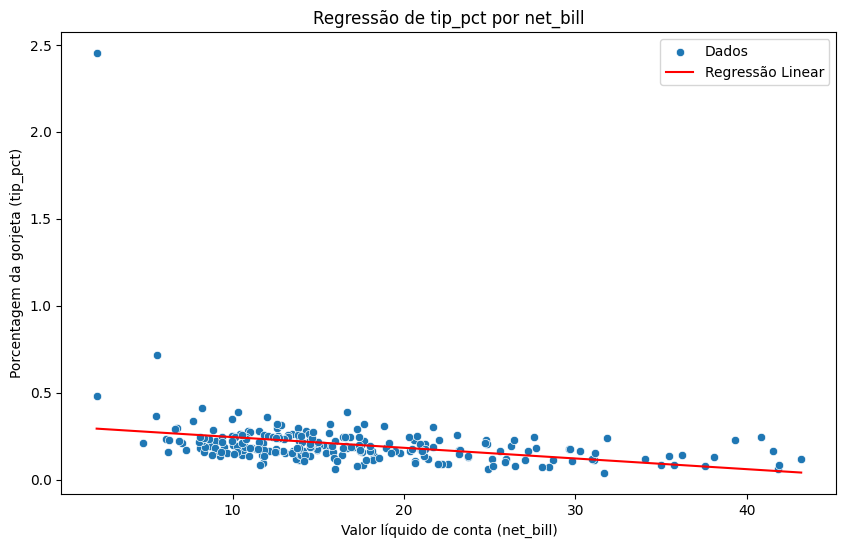

In [6]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='net_bill', y='tip_pct', data=tips,label='Dados')
sns.lineplot(x=tips['net_bill'], y=model.fittedvalues, color='red',label='Regressão Linear')

plt.title('Regressão de tip_pct por net_bill')
plt.xlabel('Valor líquido de conta (net_bill)')
plt.ylabel('Porcentagem da gorjeta (tip_pct)')
plt.legend()
plt.show()

### 3. Comente

Compare os dois gráficos e comente (de forma objetiva e suscinta) a relação entre eles e a diferença do ajuste. Podemos comparar diretamente os $R^2$s?

O gráfico de tip mostra uma correlação positiva e o gráfico de tip_pct mostra uma correlação negativa. O ajuste da regressão de tip em função de net_bill pode resultar em um modelo mais robusto com um 
mais alto, indicando que uma maior proporção da variação nas gorjetas pode ser explicada pelo valor líquido da conta. Ao analisar tip_pct, o ajuste pode apresentar um 
mais baixo. Isso pode ser notado ao analisarmos o sumário do modelo indicando uma diminuição no R-squared.

### 4. Ajuste do modelo em outra escala

Com o modelo no item 3, obtenha a preditiva do valor da gorjeta:
  1. obtenha o valor predito ```pred``` para ```tip_pct``` (dica, veja o atributo ```reg.fittedvalues```)
  2. obtenha o valor predito para ```tip``` como ```tip_pct * net_bill```
  3. calcule o $R^2$ do modelo para ```tip```
  4. compare esse $R^2$ com o do item 1

In [14]:
tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])
tips['net_bill'] = tips['total_bill'] - tips['tip']

# Ajustar o modelo para tip_pct
model_tip_pct = smf.ols('tip_pct ~ net_bill', data=tips).fit()

# Obter os valores preditos para tip_pct
pred_tip_pct = model_tip_pct.fittedvalues

tips['predicted_tip'] = pred_tip_pct * tips['net_bill']

model_tip = smf.ols('tip ~ net_bill', data=tips).fit()

# Obter o R^2 do modelo
r_squared_tip = model_tip.rsquared

r_squared_tip_pct = model_tip_pct.rsquared

print(f"R^2 para o modelo de tip_pct: {r_squared_tip_pct:.4f}")
print(f"R^2 para o modelo de tip: {r_squared_tip:.4f}")

R^2 para o modelo de tip_pct: 0.0913
R^2 para o modelo de tip: 0.3325
